# 03. 선형대수와 Numpy 프로그래밍
> 머신러닝에 꼭 필요한 선형대수학 개념들을 배우고 이를 Numpy로 구현하는 방법을 배워봅시다.

- toc: true 
- badges: true
- comments: true
- categories: [Day 1]
- permalink: /linear_algebra_with_numpy
- exec: colab

### 1. 선형대수란 무엇일까요?

선형대수는 뭔가 거창한 이름같아 보입니다. 선형대수학이란 무엇일까요? 우리는 선형대수학에서 "선형"과 "대수학"라는 단어의 의미에 대해 생각해볼 필요가 있습니다.
<br><br>

#### 1.1. 선형(Linear)이란?
위키피디아의 설명에 따르면
선형성 또는 선형은 직선처럼 똑바른 도형, 또는 그와 비슷한 성질을 갖는 대상이라는 뜻으로, 이러한 성질을 갖고 있는 변환 등에 대하여 쓰는 용어입니다.
일반적으로 우리가 직선에 대해 생각할 때 $y = x + 3$이나 $y = 2x$와 같은 직선을 생각해볼 수 있습니다. 

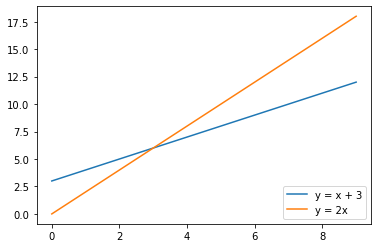

In [30]:
from matplotlib import pyplot as plt


plt.plot([x for x in range(0, 10)], [x + 3 for x in range(0, 10)], label='y = x + 3')
plt.plot([x for x in range(0, 10)], [x * 2 for x in range(0, 10)], label='y = 2x')
plt.legend(loc='lower right')
plt.show()
plt.close()

$y = x + 3$의 경우 입력(x)을 넣으면 거기에 3을 더한 값이 결과(y)가 됩니다. $y = 2x$의 경우 입력(x)을 넣으면 거기에 2를 곱한 값이 결과 (y)가 됩니다. 이렇게 선형적인 직선의 경우 곱하거나 더한, 즉 변화를 가한 딱 그만큼만 변화가 이루어집니다. 그러나 비선형적인 $y = x^2 + 3$에 생각해봅시다.


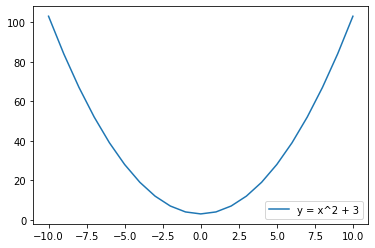

In [29]:
plt.plot([x for x in range(-10, 11)], [x ** 2 +3 for x in range(-10, 11)], label='y = x^2 + 3')
plt.legend(loc='lower right')
plt.show()
plt.close()

$y = x^2 + 3$의 경우 입력에 대해 우리가 변화를 준 값은 +3 밖에 없지만 $x=10$일 때 y값은 $10+3$인 $13$이 아니라 $10^2 + 3$인 $103$이 됩니다. 이렇게 비선형적인 곡선의 경우, 우리가 변화를 가한 것과 다르게 값이 변화하였습니다. 즉, 선형성이라는 것은 우리가 변화를 가한 만큼만 변화하는, 예측 가능한 시스템을 의미합니다. 대부분의 경우 위 처럼 직선적인 시스템을 선형적인 시스템이라고 합니다. <br><br>

#### 1.2. 대수(Algebra)란?

대수학, 대수의 '대'는 큰 것을 의미하는 것이 아니라, '대신하다'를 의미합니다. 그러니까, 위와 같은 선형시스템(직선)이 수를 대신하는 것이 바로 선형대수학입니다. 수의 본질은 숫자가 아닌 연산에 있습니다. 950123-1234567과 같은 주민등록번호나 010-1234-5678과 같은 전화번호는 숫자는 맞지만 이 숫자로 연산을 해버리면 그 결과는 아무런 의미가 없습니다. 때문에 주민등록번호나 전화번호는 숫자는 맞지만 수는 아닙니다.
<br>

![](https://memegenerator.net/img/instances/68463444/i-am-pythagoras-all-is-number.jpg)
<br>

피타고라스는 기원전 약 500년 전에 All is number라는 말을 남겼습니다. 모든 것이 수라는 것입니다. 우리는 앞으로 배울 내용에 따르면 직선과 직선을 더할 수도 있고, 직선과 직선을 곱할 수도 있고, 직선과 직선을 뺄 수도 있습니다. 때문에 이 직선으로 수를 대신하는 학문이 바로 선형 대수학입니다. 피타고라스의 말 처럼 연산이 가능하다면 숫자가 아닌 직선도 수가 될 수 있다는 것입니다. 우리는 앞으로 이 직선들을 이용해서 연산을 수행할 것입니다. <br><br>


### 2. 그러면 왜 선형대수학을 알아야 하는가?

이제 우리는 이 직선을 가지고 연산을 수행할 것이라고 이야기했습니다. 그런데 이 선형대수학이 도대체 빅데이터 분석과 무슨 상관일까요? 아래의 데이터를 볼까요?

In [131]:
import pandas as pd

fruit_df = pd.DataFrame(
    columns=['농장', '당도' , '수분함유량', '등급(정답)'],

    data=[['농장A', 35.2, 16.3, '1등급'],
          ['농장A', 16.9, 6.5, '3등급'],
          ['농장B', 18.4, 44.5, '1등급'],     
          ['농장C', 27.4, 18.1, '2등급'],
          ['농장D', 24.0, 25.2, '2등급']]
)

fruit_df.head(10)

,농장,당도,수분함유량,등급(정답)
0,농장A,35.2,16.3,1등급
1,농장A,16.9,6.5,3등급
2,농장B,18.4,44.5,1등급
3,농장C,27.4,18.1,2등급
4,농장D,24.0,25.2,2등급


이 데이터는 4개의 열을 가지고 있습니다. 그러나 컴퓨터는 자연어를 이해할 수 없기 때문에 농장의 이름과 등급등에 들어간 자연어를 숫자로 맵핑해보겠습니다.

In [137]:
from copy import deepcopy


farm_map = {'농장A':0, '농장B':1, '농장C':2, '농장D':3}
rating_map = {'1등급':0, '2등급':1, '3등급':2}

new_fruit_df = deepcopy(fruit_df)
new_fruit_df['농장'] = fruit_df['농장'].map(farm_map)
new_fruit_df['등급(정답)'] = fruit_df['등급(정답)'].map(rating_map)

new_fruit_df.head(10)

,농장,당도,수분함유량,등급(정답)
0,0,35.2,16.3,0
1,0,16.9,6.5,2
2,1,18.4,44.5,0
3,2,27.4,18.1,1
4,3,24.0,25.2,1


이렇게 하면 모든 데이터가 숫자가 되었습니다. 이 때, 이 과일들을 시각화 해볼까요?

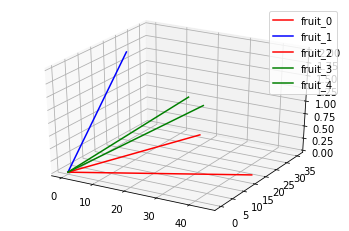

In [147]:
from matplotlib import pyplot as plt

colors = ['r', 'g', 'b']

def get_fruit(idx):
    return [0, new_fruit_df['수분함유량'][idx]], \
           [0, new_fruit_df['당도'][idx]], \
           [0, new_fruit_df['등급(정답)'][idx]], \
    

ax = plt.figure().gca(projection='3d')
ax.plot(*get_fruit(0), label='fruit_0', c=colors[new_fruit_df['등급(정답)'][0]])
ax.plot(*get_fruit(1), label='fruit_1', c=colors[new_fruit_df['등급(정답)'][1]])
ax.plot(*get_fruit(2), label='fruit_2', c=colors[new_fruit_df['등급(정답)'][2]])
ax.plot(*get_fruit(3), label='fruit_3', c=colors[new_fruit_df['등급(정답)'][3]])
ax.plot(*get_fruit(4), label='fruit_4', c=colors[new_fruit_df['등급(정답)'][4]])
ax.legend()
plt.show()
plt.close()

의사결정에 영향을 주지 않는 열인 '농장'열을 제거하고 모든 데이터를 3차원으로 표시하면 위처럼 각각 직선으로 표시할 수 있습니다.
물론 공간상에서 데이터 하나를 점으로 표시할 수도 있지만, 이렇게 원점(0,0,0)에서 해당 점까지 뻗어나간 직선으로도 생각할 수 있습니다.
앞으로 이 직선들을 더하고 빼고 곱하고 하면서 각종 연산을 수행하면서 이 데이터들을 구별해낼 선을 찾아내는 찾아내는 '분류' 작업을 하게 될텐데요.
때문에 우리는 선형대수학을 공부해서 직선들끼리 더하고 빼고 곱하는 방법을 배워야합니다. <br><br>

### 3. 벡터와 스칼라

선형대수학에서의 기본 조각은 바로 직선이라고 했습니다. 이 직선을 우리는 이제부터 벡터라고 부릅니다. 흔히들 벡터는 $\vec{a}$나 $\vec{x}$처럼 알파벳 위에 화살표를 표시합니다. 그리고 흔히 우리는 물리학시간에 벡터는 "크기와 방향이 있는 물리량"이라고 배웁니다. 그런데 이렇게 생각하면 너무 어렵게만 느껴집니다. 물리학에서는 벡터가 